# Sensor Validation

This Notebook aims to indicate the statistical measures that have been completed in order to validat ethe IR camera as an effective sensor for temperature measure. We look at a comparison between a mercury thermometer and an IR camera.

In [1]:
#Initializations and importing data
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from pandas import read_csv
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon

# load data file

df = pd.read_csv("C:/Users/user/Desktop/stats.csv")

In [4]:
time = df['time (s)'] # Assigning the time component of the data
temp = df.loc[:,'Thermometer (C)':'IR Camera (C)'] # Taking out the time element from the data
therm = df['Thermometer (C)'] # Assigning the thermometer component of the data
cam = df['IR Camera (C)'] # Assigning the Camera component of the data
print(temp)

     Thermometer (C)  IR Camera (C)
0                2.0              2
1                2.0              2
2                2.0              2
3                2.0              2
4                2.0              2
5                2.0              2
6                2.0              2
7                2.0              2
8                2.0              2
9                2.0              2
10               2.0              2
11               2.0              2
12               2.0              2
13               2.0              2
14               2.0              2
15               2.0              2
16               2.2              2
17               2.2              2
18               2.2              2
19               2.2              2
20               2.4              2
21               2.4              3
22               2.4              3
23               2.4              3
24               2.4              3
25               2.4              3
26               2.4        

## Shapiro-Wilk normality Test

This test will help with normality testing of the data.
If the p-value is less than or equal to 0.05, we can reject normality of the data with a 95% confidence. If the test is passed, we can conclude that there was no significant departure from normality.

In [5]:
Therm_Shapiro = sp.stats.shapiro(therm)
IR_Shapiro = sp.stats.shapiro(cam)
print('W,p - Thermometer = ',Therm_Shapiro)
print('W,p - IR Camera =', IR_Shapiro)

W,p - Thermometer =  (0.8978908061981201, 1.025666160720483e-15)
W,p - IR Camera = (0.8980547189712524, 1.0577508158504103e-15)


As seen from the tests above, the p-value is greater than 0.05, which suggests that the data is not normal, however, this is due to the data being in clusters of the range. It can however, be stated that due to the data being continuos as a result of it's physical characteristic in the form of temperature, it can therefore be assumed to be normal.

## Paired t-test

This test is used to compare the means of to samples and weather the difference between these two related quantities is zero. It is generally accepted that if the p-value is less than 0.05, we can deduce that there is a statistically significant difference between the two means. The greater the t-values, the greater the evidence that there is a difference between the samples. The closer the t-value to zero, the smaller the differnce between samples.

In [6]:
print('Thermometer mean =',np.mean(therm))
print('IR Camera mean =',np.mean(cam))
print('Thermometer median =',np.median(therm))
print('IR Camera median =',np.median(cam))
print('Thermometer standard deviation =',np.std(therm))
print('IR Camera standard deviation =',np.std(cam))
print('Thermometer T-test =',sp.stats.ttest_rel(therm, cam, 0))

Thermometer mean = 29.883499999999984
IR Camera mean = 29.965
Thermometer median = 27.7
IR Camera median = 28.0
Thermometer standard deviation = 21.28318885294212
IR Camera standard deviation = 21.209167239663152
Thermometer T-test = Ttest_relResult(statistic=-5.683086342744811, pvalue=2.5562407749088326e-08)


Given the results above, the p-value suggests that ther is a less than 0.001% that the two samples belong to the same population, suggesting that the thermometer and IR camera measurements are different, however, if one looks at the effect size which is defined as:

$$
ES = \frac{[mean experimental group] - [mean control group]}{SD}
$$

one gets a value close to -0.004, which is very small. This suggests that the average temperature read by the IR camera is 0.004 standard deviations below that of the thermometer average temperature. Which in turn suggests taht the the two means are very close and that the data is closely related. 

## Wilcoxon rank test

Now we will look at the Wilcoxon rank test. This test is very simillar to the T-test in that it measures if the difference between statistical measures of two sets are zero. However, unlike the mean in the T-test, the Wilcoxon rank test looks at the medians of the two samples.

The test works on data with at least more than 30 samples where normal distribution is not assumed. It commences by finding the difference between the two data sets and then the absolute difference between them. These are then ranked from smallest to largest. Both the ranks of the negative differences and the positive differences are summed separately. The lowest sum is then taken to be your W-statistic.

The W statistic is compared with W statistic critical values from standard tables. however, for a large number of samples, the Z distribution is used and followed.

For a 2 sided distribution, with an alpha level of 0.05, the corresponding Z scores as per a standard table will be -1.96 on the left and 1.96 on the right. Thus, if the calculated Z score is less than -1.96 or greater than 1.96, the null hypothesis  is rejected.

In [7]:
print(sp.stats.wilcoxon(therm, cam, zero_method='wilcox'))
print(sp.stats.ranksums(therm, cam))

WilcoxonResult(statistic=10043.5, pvalue=1.2027124932369797e-05)
RanksumsResult(statistic=-1.4046701883413704, pvalue=0.1601193745663505)


Given the fact that Z_calc > Z_standard = -1.40 > -1.96, the null hypothesis is not rejected, thus the median of the IR camera values can be said to be equal to the median of the thermometer values. We can then infer that theses two samples are from the same population and thus the IR camera values can be used as a reliable means to temperature reading.

# Histograms of the Thermometer and IR Camera temperature readings

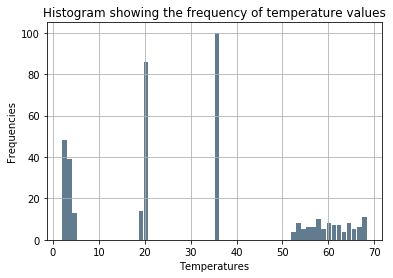

In [8]:
size, scale = 1000, 100
Thermometer = pd.Series(therm)

Thermometer.plot.hist(grid=True, bins=60, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram showing the frequency of temperature values')
plt.xlabel('Temperatures')
plt.ylabel('Frequencies')
Thermometer = pd.Series(therm)

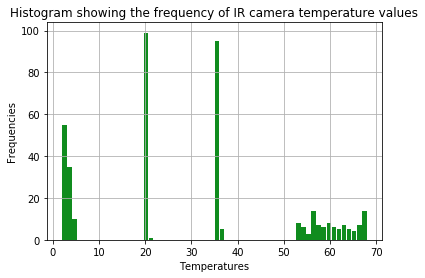

In [9]:
size, scale = 1000, 10

IR_cam = pd.Series(cam)

IR_cam.plot.hist(grid=True, bins=60, rwidth=0.9,
                   color='#108c1e')
plt.title('Histogram showing the frequency of IR camera temperature values')
plt.xlabel('Temperatures')
plt.ylabel('Frequencies')
IR_cam = pd.Series(cam)

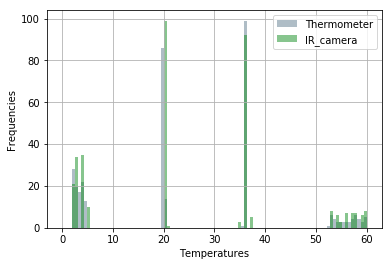

In [10]:
bins = np.linspace(0, 60, 100)

plt.hist(therm, bins, alpha=0.5, label='Thermometer', color = '#607c8e')
plt.hist(cam, bins, alpha=0.5, label='IR_camera', color = '#108c1e')
plt.legend(loc='upper right')
plt.xlabel('Temperatures')
plt.ylabel('Frequencies')
plt.grid(True)
plt.show()

In [11]:
df_1 = pd.read_csv("C:/Users/user/Desktop/Ice.csv")
df_2 = pd.read_csv("C:/Users/user/Desktop/Room.csv")
df_3 = pd.read_csv("C:/Users/user/Desktop/PC.csv")
df_4 = pd.read_csv("C:/Users/user/Desktop/Boiling.csv")

In [12]:
time = df_1['time (s)'] # Assigning the time component of the data
Ice = df_1.loc[:,'Thermometer (C)':'IR Camera (C)'] # Taking out the time element from the data
therm_1 = df_1['Thermometer (C)'] # Assigning the thermometer component of the data
cam_1 = df_1['IR Camera (C)'] # Assigning the Camera component of the data

time = df_2['time (s)'] # Assigning the time component of the data
Room = df_2.loc[:,'Thermometer (C)':'IR Camera (C)'] # Taking out the time element from the data
therm_2 = df_2['Thermometer (C)'] # Assigning the thermometer component of the data
cam_2 = df_2['IR Camera (C)'] # Assigning the Camera component of the data

time = df_3['time (s)'] # Assigning the time component of the data
PC = df_3.loc[:,'Thermometer (C)':'IR Camera (C)'] # Taking out the time element from the data
therm_3 = df_3['Thermometer (C)'] # Assigning the thermometer component of the data
cam_3 = df_3['IR Camera (C)'] # Assigning the Camera component of the data

time = df_4['time (s)'] # Assigning the time component of the data
Boiling = df_4.loc[:,'Thermometer (C)':'IR Camera (C)'] # Taking out the time element from the data
therm_4 = df_4['Thermometer (C)'] # Assigning the thermometer component of the data
cam_4 = df_4['IR Camera (C)'] # Assigning the Camera component of the data


## Ice Test

WilcoxonResult(statistic=470.0, pvalue=6.26958069165584e-05)
RanksumsResult(statistic=-0.8368606938406907, pvalue=0.4026708765689534)
Thermometer mean = 3.218
IR Camera mean = 3.34
Thermometer median = 3.2
IR Camera median = 3.0


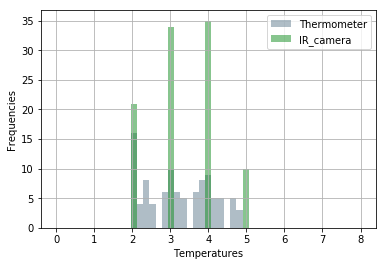

In [13]:
print(sp.stats.wilcoxon(therm_1, cam_1, zero_method='wilcox'))
print(sp.stats.ranksums(therm_1, cam_1))
print('Thermometer mean =',np.mean(therm_1))
print('IR Camera mean =',np.mean(cam_1))
print('Thermometer median =',np.median(therm_1))
print('IR Camera median =',np.median(cam_1))

bins = np.linspace(0, 8, 50)

plt.hist(therm_1, bins, alpha=0.5, label='Thermometer', color = '#607c8e')
plt.hist(cam_1, bins, alpha=0.5, label='IR_camera', color = '#108c1e')
plt.legend(loc='upper right')
plt.xlabel('Temperatures')
plt.ylabel('Frequencies')
plt.grid(True)
plt.show()

## Room Temperature Test

WilcoxonResult(statistic=0.0, pvalue=3.901519872571281e-18)
RanksumsResult(statistic=-10.52367593685213, pvalue=6.71995627772378e-26)
Thermometer mean = 19.799999999999976
IR Camera mean = 20.01
Thermometer median = 19.8
IR Camera median = 20.0


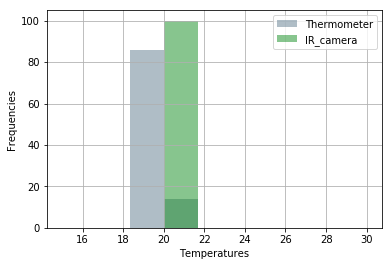

In [14]:
print(sp.stats.wilcoxon(therm_2, cam_2, zero_method='wilcox'))
print(sp.stats.ranksums(therm_2, cam_2))
print('Thermometer mean =',np.mean(therm_2))
print('IR Camera mean =',np.mean(cam_2))
print('Thermometer median =',np.median(therm_2))
print('IR Camera median =',np.median(cam_2))

bins = np.linspace(15, 30, 10)

plt.hist(therm_2, bins, alpha=0.5, label='Thermometer', color = '#607c8e')
plt.hist(cam_2, bins, alpha=0.5, label='IR_camera', color = '#108c1e')
plt.legend(loc='upper right')
plt.xlabel('Temperatures')
plt.ylabel('Frequencies')
plt.grid(True)
plt.show()

## PC Test

WilcoxonResult(statistic=39.0, pvalue=0.644023401761261)
RanksumsResult(statistic=0.09284877771079197, pvalue=0.9260236993391515)
Thermometer mean = 36.001999999999995
IR Camera mean = 36.02
Thermometer median = 36.0
IR Camera median = 36.0


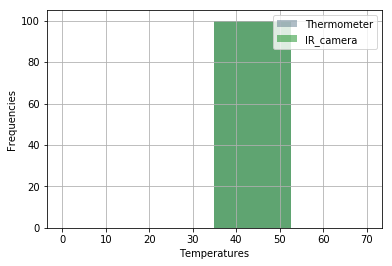

In [15]:
print(sp.stats.wilcoxon(therm_3, cam_3, zero_method='wilcox'))
print(sp.stats.ranksums(therm_3, cam_3))
print('Thermometer mean =',np.mean(therm_3))
print('IR Camera mean =',np.mean(cam_3))
print('Thermometer median =',np.median(therm_3))
print('IR Camera median =',np.median(cam_3))

bins = np.linspace(0, 70, 5)

plt.hist(therm_3, bins, alpha=0.5, label='Thermometer', color = '#607c8e')
plt.hist(cam_3, bins, alpha=0.5, label='IR_camera', color = '#108c1e')
plt.legend(loc='upper right')
plt.xlabel('Temperatures')
plt.ylabel('Frequencies')
plt.grid(True)
plt.show()

## Boiling Water Test

WilcoxonResult(statistic=1490.0, pvalue=0.6552299318898274)
RanksumsResult(statistic=0.05131116662964819, pvalue=0.9590775701433755)
Thermometer mean = 60.514000000000024
IR Camera mean = 60.49
Thermometer median = 60.3
IR Camera median = 60.0


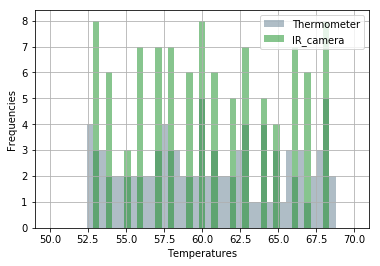

In [16]:
print(sp.stats.wilcoxon(therm_4, cam_4, zero_method='wilcox'))
print(sp.stats.ranksums(therm_4, cam_4))
print('Thermometer mean =',np.mean(therm_4))
print('IR Camera mean =',np.mean(cam_4))
print('Thermometer median =',np.median(therm_4))
print('IR Camera median =',np.median(cam_4))

bins = np.linspace(50, 70, 50)

plt.hist(therm_4, bins, alpha=0.5, label='Thermometer', color = '#607c8e')
plt.hist(cam_4, bins, alpha=0.5, label='IR_camera', color = '#108c1e')
plt.legend(loc='upper right')
plt.xlabel('Temperatures')
plt.ylabel('Frequencies')
plt.grid(True)
plt.show()

## Analysis of the above results

Since the above tests have a large number of samples where n > 30 (n = 100) we will still use the Z-distribution, thus our critical value will still remain -1.96 0n the left and 1.96 on the right.

For the Ice test Z_calc > Z_standard, -0.837 > -1.96 thus the null hypothesis is not rejected and the difference between medians is indeed 0

For the Room test Z_calc < Z_standard, -10.52 < -1.96 thus the null hypothesis is rejected, suggesting a difference between the medians.

For the PC test Z_calc < Z_standard, 0.093 < 1.96 thus the null hypothesis is not rejected and the difference between medians is indeed 0

For the Boiling test Z_calc < Z_standard, 0.051 < 1.96 thus the null hypothesis is rejected and the difference between medians is indeed 0

# Scatter plots of each experiment

The plots below will indicates a scattering of data of each of the 4 experiments carried out. The X-axis  will indicate the reference thermometer temperatures whilst the Y-axis will indicate the experimental IR camera temperatures.

## Ice Test

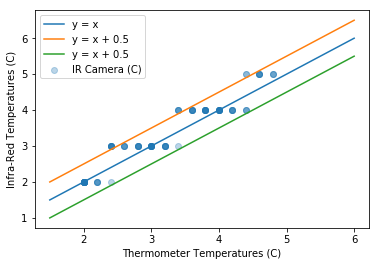

In [87]:
plt.scatter(therm_1, cam_1, alpha=0.3)
#plt.title('Scatter Plot showing the Thermometer temperatures vs the IR temperatures for the Ice test')
plt.xlabel('Thermometer Temperatures (C)')
plt.ylabel('Infra-Red Temperatures (C)')
# Prepare the data
x = np.linspace(1.5, 6, 100)

# Plot the data
plt.plot(x, x, label='y = x')
plt.plot(x, x + 0.5,label = 'y = x + 0.5')
plt.plot(x, x - 0.5,label = 'y = x + 0.5')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Room Temperature Test

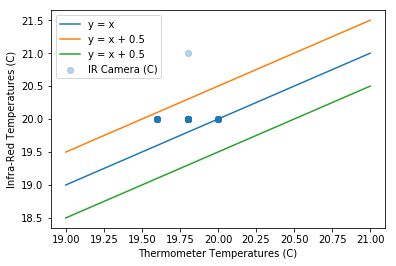

In [86]:
plt.scatter(therm_2, cam_2, alpha=0.3)
#plt.title('Scatter Plot showing the Thermometer temperatures vs the IR temperatures for the Room temperature test')
plt.xlabel('Thermometer Temperatures (C)')
plt.ylabel('Infra-Red Temperatures (C)')
# Prepare the data
x = np.linspace(19, 21, 100)

# Plot the data
plt.plot(x, x, label='y = x')
plt.plot(x, x + 0.5,label = 'y = x + 0.5')
plt.plot(x, x - 0.5,label = 'y = x + 0.5')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# PC Test

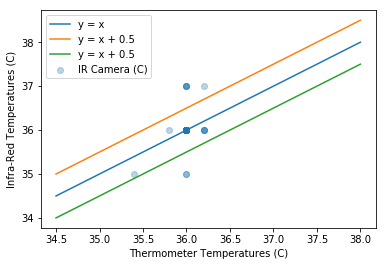

In [85]:
plt.scatter(therm_3, cam_3, alpha=0.3)
#plt.title('Scatter Plot showing the Thermometer temperatures vs the IR temperatures for the PC test')
plt.xlabel('Thermometer Temperatures (C)')
plt.ylabel('Infra-Red Temperatures (C)')
# Prepare the data
x = np.linspace(34.5, 38, 100)

# Plot the data
plt.plot(x, x, label='y = x')
plt.plot(x, x + 0.5,label = 'y = x + 0.5')
plt.plot(x, x - 0.5,label = 'y = x + 0.5')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Boiling Water Test

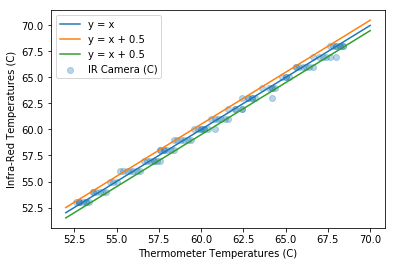

In [84]:
plt.scatter(therm_4, cam_4, alpha=0.3)
#plt.title('Scatter Plot showing the Thermometer temperatures vs the IR temperatures for the Boiling water test')
plt.xlabel('Thermometer Temperatures (C)')
plt.ylabel('Infra-Red Temperatures (C)')
# Prepare the data
x = np.linspace(52, 70, 100)

# Plot the data
plt.plot(x, x, label='y = x')
plt.plot(x, x + 0.5,label = 'y = x + 0.5')
plt.plot(x, x - 0.5,label = 'y = x + 0.5')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Combined Results

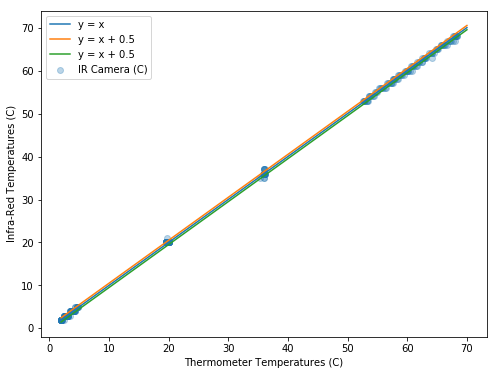

In [101]:
plt.scatter(therm, cam, alpha=0.3)
#plt.title('Scatter Plot showing the Thermometer temperatures vs the IR temperatures for the Boiling water test')
plt.xlabel('Thermometer Temperatures (C)')
plt.ylabel('Infra-Red Temperatures (C)')
# Prepare the data
x = np.linspace(2, 70, 100)

# Plot the data
plt.plot(x, x, label='y = x')
plt.plot(x, x + 0.5,label = 'y = x + 0.5')
plt.plot(x, x - 0.5,label = 'y = x + 0.5')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [99]:
import matplotlib.pyplot as plt
 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

Current size: [12.0, 10.0]


## Analysis of Scatter plot Results

In all of the scatter plots above, the majority of points are found withing the range of y = x + 0.5 and  y = x - 0.5. This indicates that at worst, there is a difference in temperature between the IR camera and thermometer of only 1 degree celsius.  This eeror could have been as a result of general fluctutations in temperature when taking the readings or as a result of pointing the IR camera on a different spot when taking the reading. 